### Time Series – Moving Average

#### Steps used in this Algorithm:-

1.  Import all the necessary libraries

2.  Create a Sample Time Series Data

3.  Calculate the Simple Moving Average (SMA)

4.  Calculate the Exponential Moving Average (EMA)

5.  Plot the Time Series and Moving Average

6.  Calculate the Simple Forecast using Moving Average

### Step 1: Import all the necessary libraries

In [178]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

### Step 2: Create a Sample Time Series Data

In [179]:
# Set random seed for reproducibility
np.random.seed(42)

# Create date range
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")

# Generate time series data (trend + noise)
data = np.cumsum(np.random.randn(100)) + 50

# Create DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Value": data
})

# Set Date as index
df.set_index("Date", inplace=True)

### display the etire dataset
print(df)

                Value
Date                 
2023-01-01  50.496714
2023-01-02  50.358450
2023-01-03  51.006138
2023-01-04  52.529168
2023-01-05  52.295015
...               ...
2023-04-06  39.287646
2023-04-07  39.583767
2023-04-08  39.844822
2023-04-09  39.849935
2023-04-10  39.615348

[100 rows x 1 columns]


In [180]:
### display the first five rows of the dataset

df.head()

,Value
Date,
2023-01-01,50.496714
2023-01-02,50.358450
2023-01-03,51.006138
2023-01-04,52.529168
2023-01-05,52.295015


### OBSERVATIONS:

1. The above dataset contains the data value for every date.

### Step 3: Calculate the Simple Moving Average (SMA)

In [181]:
### Compute the Simple Moving Average (SMA) of the window size = 5
df['SMA_5'] = df['Value'].rolling(window=5).mean()


### Compute the Simple Moving Average (SMA) of the window size = 10
df['SMA_10'] = df['Value'].rolling(window=10).mean()

In [182]:
df

,Value,SMA_5,SMA_10
Date,,,
2023-01-01,50.496714,NaN,NaN
2023-01-02,50.358450,NaN,NaN
2023-01-03,51.006138,NaN,NaN
2023-01-04,52.529168,NaN,NaN
2023-01-05,52.295015,51.337097,NaN
...,...,...,...
2023-04-06,39.287646,40.965199,40.965035
2023-04-07,39.583767,40.447355,40.843911
2023-04-08,39.844822,40.122133,40.716018


### OBSERVATIONS:

1. The above dataset contains the Simple Moving Average of first five records sequentially in a dataset in SMA_5 column.


2. The above dataset contains the Simple Moving Average of first ten records sequentially in a dataset in SMA_10 column.

### Step 4: Calculate the Exponential Moving Average (EMA)

In [183]:
df['EMA_5'] = df['Value'].ewm(span=5, adjust=False).mean()


df['EMA_10'] = df['Value'].ewm(span=10, adjust=False).mean()

In [184]:
df

,Value,SMA_5,SMA_10,EMA_5,EMA_10
Date,,,,,
2023-01-01,50.496714,NaN,NaN,50.496714,50.496714
2023-01-02,50.358450,NaN,NaN,50.450626,50.471575
2023-01-03,51.006138,NaN,NaN,50.635797,50.568768
2023-01-04,52.529168,NaN,NaN,51.266921,50.925205
2023-01-05,52.295015,51.337097,NaN,51.609619,51.174261
...,...,...,...,...,...
2023-04-06,39.287646,40.965199,40.965035,40.514668,40.786741
2023-04-07,39.583767,40.447355,40.843911,40.204368,40.568018
2023-04-08,39.844822,40.122133,40.716018,40.084519,40.436528


### OBSERVATIONS:

1. The EMA calculates the Exponential Moving Average of the Value columns for the 5 period and 10 period data.

### Step 5: Plot the Time Series and Moving Average

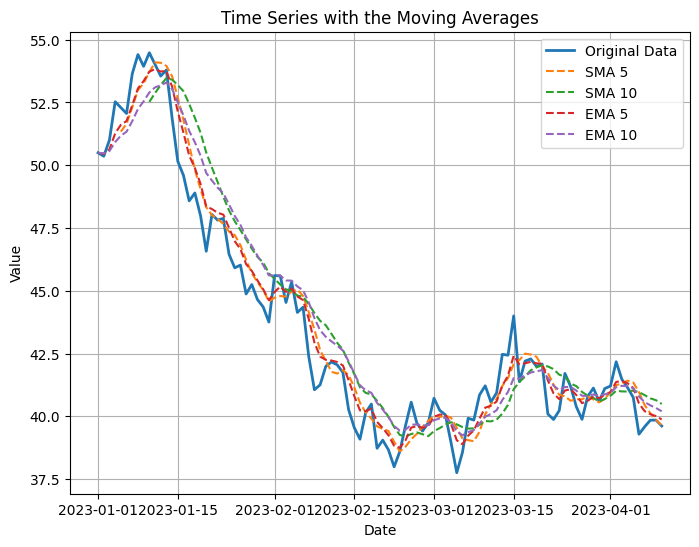

In [185]:
plt.figure(figsize=(8,6))

plt.plot(df['Value'], label='Original Data', linewidth=2)

plt.plot(df['SMA_5'], label='SMA 5',         linestyle='--')

plt.plot(df['SMA_10'], label='SMA 10',         linestyle='--')

plt.plot(df['EMA_5'], label='EMA 5',         linestyle='--')

plt.plot(df['EMA_10'], label='EMA 10',         linestyle='--')

plt.title('Time Series with the Moving Averages')
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### OBSERVATIONS:

1. The above graph depicts how the time series varies w.r.to the moving averages.

### Step 6: Calculate the Simple Forecast using Moving Average

In [186]:
# Forecast next value using last moving average
import math


print("======================Original Value============================================")

ans = df["EMA_5"].iloc[-1]
print(ans)

print("====================Next Forecast Value of the Moving Average===================")
next_val = math.ceil(ans)

print(next_val)

======================Original Value============================================
39.87599905922464
====================Next Forecast Value of the Moving Average===================
40
